## Fonctions normalisation, génération des fichiers, dataset

In [193]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def convert_to_numeric(value):
    """
    Converts strings with 'B', 'M', or 'k' suffixes to numeric values.
    
    Parameters:
    value (str or float): The value to convert.

    Returns:
    float: The numeric value.
    """
    if isinstance(value, str):
        if 'B' in value:
            return float(value.replace('B', '')) * 1_000_000_000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
    return float(value)  # If it's already numeric or doesn't have suffixes

def normalize_data(data, exclude_columns=[]):
    """
    Normalizes the numeric columns of a dataset to a range between 0 and 1 using Min-Max Scaling.
    
    Parameters:
    data (pd.DataFrame): The dataset to normalize.
    exclude_columns (list): List of column names to exclude from normalization (e.g., non-numeric columns).

    Returns:
    pd.DataFrame: The dataset with normalized numeric columns.
    """
    # Convert columns to numeric if they contain "B", "M", or "k"
    for col in data.columns:
        if col not in exclude_columns:
            data[col] = data[col].apply(convert_to_numeric)
    
    # Separate excluded columns (e.g., country names) and numeric columns
    data_to_normalize = data.drop(columns=exclude_columns)
    data_excluded = data[exclude_columns]
    
    # Apply Min-Max Scaling to numeric columns
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data_to_normalize)
    
    # Convert the normalized data back to a DataFrame
    normalized_df = pd.DataFrame(normalized_data, columns=data_to_normalize.columns, index=data.index)
    
    # Combine excluded columns with the normalized data
    final_data = pd.concat([data_excluded, normalized_df], axis=1)
    
    return final_data







import pandas as pd
import os
"""
Fonction pour générer les fichiers par années
"""

def generate_files_by_year(data, path, suffix):

    os.makedirs(path, exist_ok=True)
    
    for year in data.columns[1:]:
        year_data = data[['country', year]] 
        filename = os.path.join(path, f"{year}{suffix}.csv")
        year_data.to_csv(filename, index=False)
        
        
        
        
        
        
import pandas as pd
import glob

"""
Fonction pour générer un array de dataframes à partir des fichiers
"""
def generate_df_from_files(path, suffix):

    if not os.path.exists(path):
        raise ValueError(f"The directory {path} does not exist.")
    
    file_list = glob.glob(os.path.join(path, f"*{suffix}.csv"))
    dataframes = []

    for file in file_list:
        df = pd.read_csv(file)
        dataframes.append(df)

    return dataframes





import pandas as pd
import os

"""
Function to load an array of rows (entire rows as individual elements) from a single CSV file.
"""
def generate_df_labels_from_file(file_path):
    if not os.path.exists(file_path):
        raise ValueError(f"The file {file_path} does not exist.")
    
    # Load the CSV into a DataFrame
    df = pd.read_csv(file_path)
    
    # Initialize an array to store rows
    rows_array = []

    # Append each entire row as a separate element in the list
    for _, row in df.iterrows():
        rows_array.append(row)

    return rows_array




## Population

In [194]:
pop = pd.read_csv('data_raw/pop.csv')


In [195]:
years = [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 
         1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

pop = normalize_data(pop, "country")

population =pd.DataFrame(pop[ ['country'] + [str(year) for year in years] ])
population[ population.isna().any(axis=1) ]
population = population.fillna(method='ffill')

generate_files_by_year(population, "./data_cleaned/population_by_years", "_population")


C:\Users\Julien\AppData\Local\Temp\ipykernel_16084\2447416335.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  population = population.fillna(method='ffill')


## mortalité infantile

In [196]:
child_mortality = pd.read_csv('./data_raw/child_mortality_0_5_year_olds_dying_per_1000_born.csv')

# prendre les données selon les années des olympiades
years = [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 
         1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

child_mortality = normalize_data(child_mortality, "country")
child_mortality = pd.DataFrame(child_mortality[['country'] + [str(year) for year in years]])

# imputation par la moyenne
child_mortality.iloc[:, 1:] = child_mortality.iloc[:, 1:].fillna(child_mortality.iloc[:, 1:].mean())

generate_files_by_year(child_mortality, "./data_cleaned/child_mortality_by_years", "_child_mortality")



## fertilité

In [197]:
import pandas as pd

fertility = pd.read_csv('./data_raw/children_per_woman_total_fertility.csv')


years = [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 
         1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

fertility = normalize_data(fertility, "country")
fertility =pd.DataFrame(fertility[ ['country'] + [str(year) for year in years] ])
fertility.isna().sum()

generate_files_by_year(fertility, "./data_cleaned/fertility", "_fertility")


## GDP capita

In [198]:
import pandas as pd

gdp = pd.read_csv('./data_raw/gdp_pcap.csv')


years = [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 
         1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

gdp = normalize_data(gdp, "country")
gdp =pd.DataFrame(gdp[ ['country'] + [str(year) for year in years] ])
gdp.isna().sum()

generate_files_by_year(gdp, "./data_cleaned/gdp_capita", "_gdp_capita")



## Génration des dataset 

In [ ]:
df_gdp = generate_df_from_files("./data_cleaned/gdp_capita/", "_gdp_capita")
df_pop = (generate_df_from_files("./data_cleaned/population_by_years/", "_population"))
df_fertility = (generate_df_from_files("./data_cleaned/fertility/", "_fertility"))
df_child_mortal = (generate_df_from_files("./data_cleaned/child_mortality_by_years/", "_child_mortality"))
# chargement des données de performance chaque cellule contient un dataframe pour une année selon les périodes des olympiades
#[1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
# première partie de [1948 ; 1988]
# deuxième partie de [1992 ; 2020]
df_label_first = generate_df_labels_from_file("./data_cleaned/labels_n_in_10_first_rank/first_part.csv")
df_label_second = generate_df_labels_from_file("./data_cleaned/labels_n_in_10_first_rank/second_part.csv")

ValueError: The file ./data_cleaned/labels_n_in_10_first_rank/first_part_labels_performance.csv does not exist.

In [ ]:
df_label_second[0]

Unnamed: 0                  0.0
Albania                     1.0
Algeria                    14.0
American Samoa              2.0
Andorra                     0.0
                           ... 
Venezuela                   5.0
Vietnam                     0.0
Virgin Islands, British     0.0
Zambia                      3.0
Zimbabwe                    0.0
Name: 0, Length: 184, dtype: float64

In [ ]:
f = pd.DataFrame(data=sorted(df_gdp[0]['country']))
f.to_csv('archive_raw/countries_names_gapminder.csv', index=False)

## Affichage des plot de données pour chaque dataset

ValueError: x and y must be the same size

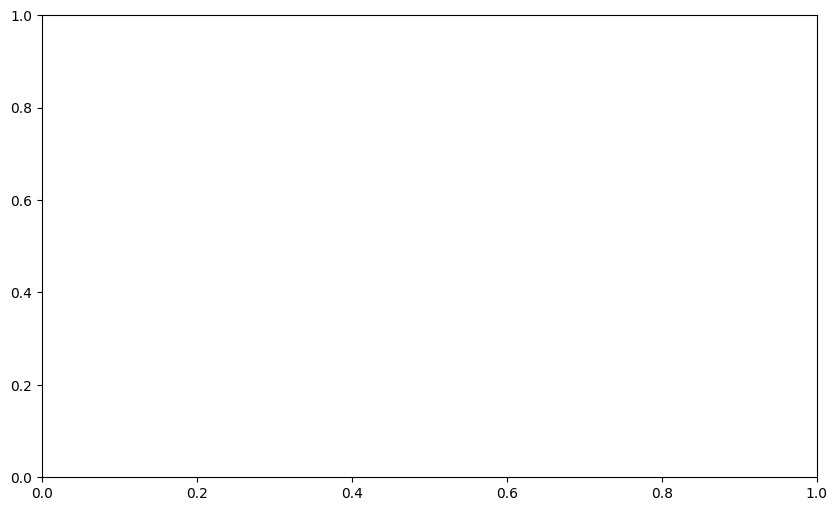

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd




plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_gdp[0]['1948'],  # Use iloc to access the first column
    df_label_first[0],  # Use iloc to access the first column
    cmap='coolwarm', 
    s=50, 
    alpha=0.7
)

# Add color bar and labels
plt.colorbar(scatter, label='Top 10 Olympic Rank (1 = Top 10)')
plt.xlabel('GDP per Capita')
plt.ylabel('Population')
plt.title(f'Scatter Plot of GDP per Capita vs Population in {year}')  # Ensure 'year' is defined
plt.show()


## Démocratie

In [ ]:
democratie = pd.read_csv("data_raw/democratie.csv", sep=";")
democratie

,country,year,polity,polity2
0,Afghanistan,1800,-6,-6.0
1,Afghanistan,1801,-6,-6.0
2,Afghanistan,1802,-6,-6.0
3,Afghanistan,1803,-6,-6.0
4,Afghanistan,1804,-6,-6.0
...,...,...,...,...
17569,Zimbabwe,2014,4,4.0
17570,Zimbabwe,2015,4,4.0
17571,Zimbabwe,2016,4,4.0
17572,Zimbabwe,2017,4,4.0


In [ ]:
# Valeurs manquantes
print(democratie.isna().sum().sum())

267


In [ ]:
 
# democratie[democratie['polity'] < -10]
dem = democratie[democratie['year'] >= 1948]

dem.head(100)


#      print(democratie_tronquee.iloc[i, 0], democratie_tronquee.iloc[i, 1], democratie_tronquee.iloc[i, 2])--

# dem.append({'year': democratie.iloc[i, 0], 'polity': democratie.iloc[i, 1], 'polity2': democratie.iloc[i, 2]}, ignore_index=True)
#print(democratie.iloc[i, 0], democratie.iloc[i, 1], democratie.iloc[i, 2])

,country,year,polity,polity2
148,Afghanistan,1948,-10,-10.0
149,Afghanistan,1949,-10,-10.0
150,Afghanistan,1950,-10,-10.0
151,Afghanistan,1951,-10,-10.0
152,Afghanistan,1952,-10,-10.0
153,Afghanistan,1953,-10,-10.0
154,Afghanistan,1954,-10,-10.0
155,Afghanistan,1955,-10,-10.0
156,Afghanistan,1956,-10,-10.0
157,Afghanistan,1957,-10,-10.0


In [ ]:
pays_dem = dem['country'].unique()
id = 0

# Afficher le i-ème pays et ses données
pays = pays_dem[id]
# print(pays)
# print(dem[dem['country'] == pays])

indices = pays_dem[pays_dem['polity1'] < 10].tolist()

# Assigner à polity2 la valeur juste avant que polity1 devienne < 10
for index in indices:
    if index > 0:
        pays_dem.at[index, 'polity2'] = pays_dem.at[index-1, 'polity2']

print(pays_dem)


In [ ]:
democratie['polity'] = democratie['polity'].fillna(method='ffill')

## Espérance de vie

In [ ]:
esperanceVie =pd.read_csv("data/lex.csv")
esperanceVie.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.9,76.1,76.2,76.4,76.5,76.7,76.8,77.0,77.1,77.3
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,75.8,75.9,76.0,76.1,76.3,76.4,76.5,76.7,76.8,76.9
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,88.9,89.0,89.2,89.3,89.4,89.5,89.6,89.7,89.8,90.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.0,91.1,91.3,91.4,91.5,91.6,91.7,91.8,91.9,92.0
4,UAE,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,83.7,83.8,83.9,84.0,84.1,84.2,84.3,84.5,84.6,84.7


In [ ]:
esperanceVie = esperanceVie.iloc[:, [0] + list(range(149, 224))] # 149, 149
esperanceVie.head()

,country,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,42.4,42.5,42.7,42.9,43.1,43.5,43.3,43.9,44.1,...,61.9,61.9,61.9,62.0,62.9,62.7,63.3,62.3,61.8,62.6
1,Angola,44.2,44.9,45.6,45.6,45.6,45.6,45.6,45.5,45.7,...,62.1,63.0,63.5,63.9,64.2,64.6,65.1,64.9,64.2,64.5
2,Albania,50.5,51.4,52.2,53.6,54.5,55.4,56.1,56.3,58.0,...,78.3,78.2,78.1,78.2,78.3,78.4,78.5,76.2,75.7,76.1
3,Andorra,NaN,NaN,74.6,74.7,74.8,75.0,75.1,75.2,75.3,...,82.0,82.0,82.0,82.1,82.1,82.1,82.2,78.3,79.6,82.7
4,UAE,52.1,55.3,58.4,58.5,58.6,58.7,58.8,58.9,58.8,...,71.6,73.0,73.2,73.4,73.5,73.7,73.9,73.2,73.0,73.4


In [ ]:
# Valeurs manquantes
print(esperanceVie.isna().sum().sum())

20


In [ ]:
# Afficher les lignes avec des valeurs manquantes
esperanceVie.isna().sum().where(lambda x : x > 0).dropna()

1948    10.0
1949    10.0
dtype: float64

In [ ]:
esperanceVie[esperanceVie['1948'].isna()]

,country,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,Andorra,NaN,NaN,74.6,74.7,74.8,75.0,75.1,75.2,75.3,...,82.0,82.0,82.0,82.1,82.1,82.1,82.2,78.3,79.6,82.7
46,Dominica,NaN,NaN,49.3,50.6,51.7,53.0,54.1,55.1,56.1,...,72.3,72.2,71.5,72.3,71.2,72.3,72.3,72.4,71.6,71.8
93,St. Kitts and Nevis,NaN,NaN,60.8,61.9,62.4,62.7,62.7,62.2,61.5,...,72.2,72.1,72.0,72.1,72.1,72.1,72.1,72.2,72.2,72.6
101,Liechtenstein,NaN,NaN,62.3,62.0,57.2,55.8,54.1,60.3,57.3,...,82.4,82.2,82.8,82.4,83.9,83.2,84.3,0.0,0.0,0.0
108,Monaco,NaN,NaN,68.2,68.1,68.3,68.7,69.0,69.3,69.7,...,79.3,79.4,79.5,79.7,79.8,79.9,80.1,80.1,79.5,80.4
113,Marshall Islands,NaN,NaN,52.1,52.6,53.0,53.4,53.9,54.3,54.7,...,64.6,64.8,64.9,65.1,65.2,65.3,65.5,65.7,66.0,65.9
132,Nauru,NaN,NaN,58.5,58.7,59.0,59.2,59.4,59.6,59.9,...,61.4,61.9,62.3,62.6,63.0,63.2,63.4,63.3,63.5,63.9
139,Palau,NaN,NaN,49.0,49.5,49.9,50.4,50.9,51.4,51.9,...,67.0,67.1,67.2,67.3,67.4,67.4,67.5,68.1,68.8,68.1
157,San Marino,NaN,NaN,72.0,72.1,72.2,72.3,72.4,72.5,72.5,...,82.0,82.0,82.0,82.0,82.0,82.1,82.2,78.8,80.1,82.6
179,Tuvalu,NaN,NaN,47.0,47.3,47.8,48.2,48.7,49.1,49.6,...,67.0,67.2,67.4,67.5,67.7,67.8,67.9,68.0,68.2,68.5


In [ ]:
esperanceVie.loc[3, '1948'] = 74.4
esperanceVie.loc[3, '1949'] = 74.5

esperanceVie.loc[46, '1948'] = 74.4
esperanceVie.loc[46, '1949'] = 74.5

esperanceVie.loc[93, '1948'] = 74.4
esperanceVie.loc[93, '1949'] = 74.5

esperanceVie.loc[101, '1948'] = 74.4
esperanceVie.loc[101, '1949'] = 74.5

esperanceVie.loc[108, '1948'] = 74.4
esperanceVie.loc[108, '1949'] = 74.5

esperanceVie.loc[113, '1948'] = 74.4
esperanceVie.loc[113, '1949'] = 74.5

esperanceVie.loc[132, '1948'] = 74.4
esperanceVie.loc[132, '1949'] = 74.5

## Aged 25 to 54 unemployment rate